In [3]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
%matplotlib inline

## 3. 探索式分析(EDA)

### 3.1 针对时间序列的特殊方法
#### 3.2 理解平稳性

<AxesSubplot:title={'center':'a10 - Drug Sales Series'}, xlabel='date'>

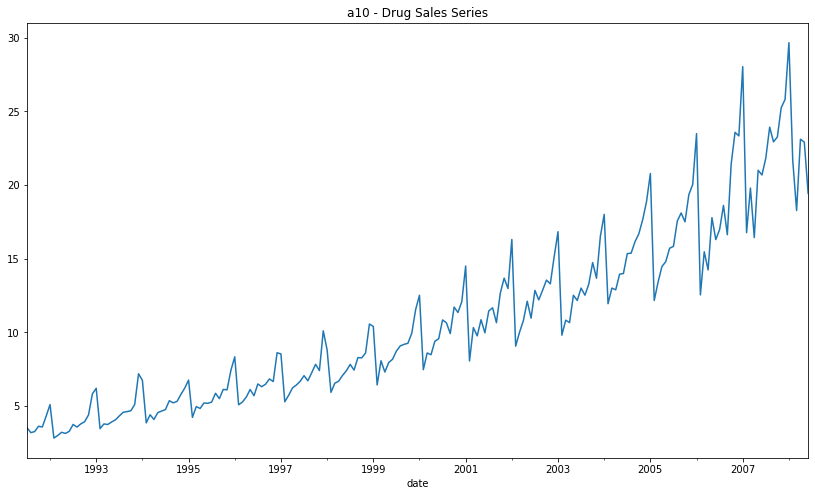

In [13]:
# 导入原始数据
url = 'data/a10.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
series = df.loc[:, 'value'].values
df.plot(figsize=(14,8), legend=None, title='a10 - Drug Sales Series')

In [19]:
# 使用ADF Test
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')

ADF Statistic: 3.1451856893067363
n_lags: 1.0
p-value: 1.0


**p值为1表示没有理由拒绝原假设，也就是存在单位根，时间序列非平稳，这也和我们的直觉是相符的**

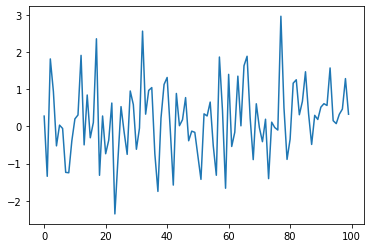

In [22]:
# 生产一组随机数检验平稳性
series1 = np.random.randn(100)
plt.plot(series1)

In [20]:
result1 = adfuller(series1, autolag='AIC')
print(f'ADF Statistic: {result1[0]}')
print(f'p-value: {result1[1]}')

ADF Statistic: -9.588680806555054
p-value: 2.0639843020333296e-16


**p值远远小于0.05，表示拒绝原假设，即时间序列是平稳的**